In [1]:
import numpy as np
import spyrit.misc.walsh_hadamard as wh
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline, interp1d
from scipy.optimize import curve_fit

from spas import read_metadata, reconstruction_hadamard
from spas import ReconstructionParameters, setup_reconstruction

H = wh.walsh2_matrix(64)/64

In [2]:
def mean_spectrum(acquisition_metadata):
    
    ind_opt = acquisition_metadata.patterns[0::2]
    ind_opt = np.array(ind_opt)/2
    ind_opt = ind_opt.astype('int')
    M = spectral_data
    M_breve = M[0::2,:] + M[1::2,:]
    spectrum = np.mean(M_breve, axis=0)
    
    return spectrum

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
f = np.load('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_center/HgAr_Lamp_center_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_center/HgAr_Lamp_center_metadata.json')

recon_center = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

spectrum_center = mean_spectrum(acquisition_metadata)

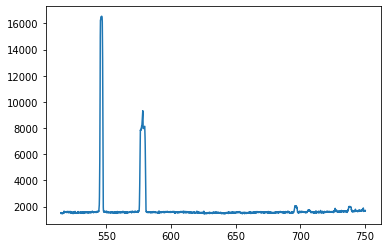

In [5]:
plt.plot(acquisition_metadata.wavelengths, spectrum_center)

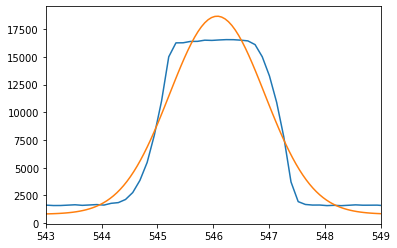

In [6]:
plt.plot(acquisition_metadata.wavelengths, spectrum_center)
plt.xlim([543, 549])

def gauss(x, a, x0, sigma, b):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + b

subset_ind = np.where((acquisition_metadata.wavelengths > 543) & (acquisition_metadata.wavelengths < 549))
x = acquisition_metadata.wavelengths[subset_ind]
y = spectrum_center[subset_ind]
subset_ind_out = np.where((acquisition_metadata.wavelengths > 540) & (acquisition_metadata.wavelengths < 543))
b0 = np.mean(acquisition_metadata.wavelengths[subset_ind_out])
p0 = [np.max(y) - b0, np.mean(x), np.std(x), b0]

popt,_ = curve_fit(gauss, x, y, p0=p0)
x_plot = np.linspace(543, 549, 100)
plt.plot(x_plot, gauss(x_plot, *popt))

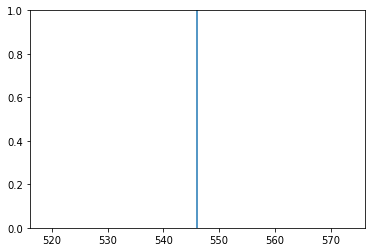

In [7]:
subset_ind = np.where((acquisition_metadata.wavelengths > 543) & (acquisition_metadata.wavelengths < 549))
peak_pos = spectrum_center.argmax()
# plt.plot(acquisition_metadata.wavelengths, spectrum_center)
# plt.xlim([543, 549])
plt.axvline(acquisition_metadata.wavelengths[peak_pos-1])

interp = CubicSpline(acquisition_metadata.wavelengths[subset_ind], spectrum_center[subset_ind])
half_max = spectrum_center[peak_pos-1]/2
range_fit = np.linspace(subset_ind[0], subset_ind[-1], 10000)
values = interp(range_fit)

In [8]:
f = np.load('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_bottom-right/HgAr_Lamp_bottom-right_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_bottom-right/HgAr_Lamp_bottom-right_metadata.json')

recon_bottom_right = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

spectrum_bottom_right = mean_spectrum(recon_bottom_right, acquisition_metadata)

TypeError: mean_spectrum() takes 1 positional argument but 2 were given

In [ ]:
plt.plot(acquisition_metadata.wavelengths, spectrum_bottom_right)

In [ ]:
f = np.load('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_top-left/HgAr_Lamp_top-left_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_top-left/HgAr_Lamp_top-left_metadata.json')

recon_top_left = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

spectrum_top_left = mean_spectrum(recon_top_left, acquisition_metadata)

In [ ]:
plt.plot(acquisition_metadata.wavelengths, spectrum_top_left)

In [ ]:
plt.figure()
plt.plot(acquisition_metadata.wavelengths, spectrum_center, color='r', label='Center')
plt.plot(acquisition_metadata.wavelengths, spectrum_bottom_right, color='g', label='Bottom right')
plt.plot(acquisition_metadata.wavelengths, spectrum_top_left, color='b', label='Top left')
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Normalized Intensity')
plt.title('HgAg lamp mean spectrum at different regions of the DMD')
plt.legend()

In [ ]:
plt.figure()
plt.plot(acquisition_metadata.wavelengths, spectrum_center, color='r', label='Center')
plt.plot(acquisition_metadata.wavelengths, spectrum_bottom_right, color='g', label='Bottom right')
plt.plot(acquisition_metadata.wavelengths, spectrum_top_left, color='b', label='Top left')
plt.xlim([542, 550])
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Normalized Intensity')
plt.title('HgAg lamp mean spectrum at different regions of the DMD')
plt.legend()
plt.figure()
plt.plot(acquisition_metadata.wavelengths, spectrum_center, color='r', label='Center')
plt.plot(acquisition_metadata.wavelengths, spectrum_bottom_right, color='g', label='Bottom right')
plt.plot(acquisition_metadata.wavelengths, spectrum_top_left, color='b', label='Top left')
plt.xlim([542, 550])
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Normalized Intensity')
plt.title('HgAg lamp mean spectrum at different regions of the DMD')
plt.legend()

In [ ]:
plt.figure()
plt.plot(acquisition_metadata.wavelengths, spectrum_center, color='r', label='Center')
plt.plot(acquisition_metadata.wavelengths, spectrum_bottom_right, color='g', label='Bottom right')
plt.plot(acquisition_metadata.wavelengths, spectrum_top_left, color='b', label='Top left')
plt.xlim([570, 590])
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Normalized Intensity')
plt.title('HgAg lamp mean spectrum at different regions of the DMD')
plt.legend()

In [ ]:
plt.figure()
plt.plot(acquisition_metadata.wavelengths, spectrum_center, color='r', label='Center')
plt.plot(acquisition_metadata.wavelengths, spectrum_bottom_right, color='g', label='Bottom right')
plt.plot(acquisition_metadata.wavelengths, spectrum_top_left, color='b', label='Top left')
plt.xlim([694, 699])
plt.ylim([0, 5000])
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Normalized Intensity')
plt.title('HgAg lamp mean spectrum at different regions of the DMD')
plt.legend()